In [1]:
%%time
import warnings 
warnings.filterwarnings("ignore") 

import  cv2
import numpy as np
from keras.models import load_model
from keras.applications import VGG16
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("./model.h5")

Using TensorFlow backend.


Wall time: 1min 3s


In [2]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml") 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() + 1
    print("Predicted Expression Probabilities")
    print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

In [3]:
from PIL import Image

Wall time: 759 ms


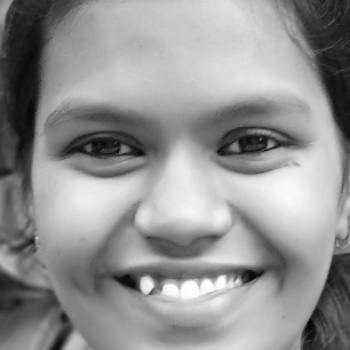

In [4]:
%%time
Image.open("./IMG_20180524_162119.JPG")

In [5]:
%%time
make_prediction("./IMG_20180524_162119.JPG")

Predicted Expression Probabilities
ANGRY: 4.476983303902671e-05
DISGUST: 0.0021295808255672455
FEAR: 0.004953959956765175
HAPPY: 0.9823300838470459
NEUTRAL: 0.009650164283812046
SAD: 0.0007596322102472186
SURPRISE: 0.00013177951041143388


Dominant Probability = HAPPY: 0.9823301
Wall time: 6.71 s


Wall time: 212 ms


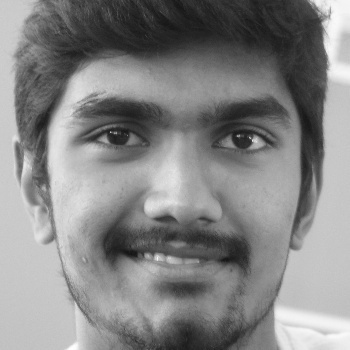

In [6]:
%%time
Image.open("./IMG_3833.JPG")

In [7]:
%%time
make_prediction("./IMG_3833.JPG")

Predicted Expression Probabilities
ANGRY: 0.0018295688787475228
DISGUST: 0.03661949560046196
FEAR: 0.016688896343111992
HAPPY: 0.9252098202705383
NEUTRAL: 0.011986643075942993
SAD: 0.007620837539434433
SURPRISE: 4.480246934690513e-05


Dominant Probability = HAPPY: 0.9252098
Wall time: 2.24 s


Wall time: 1e+03 µs


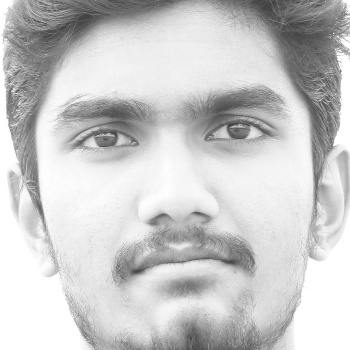

In [15]:
%%time
Image.open("./IMG_9856.JPG")

In [14]:
%%time
make_prediction("./IMG_9856.JPG")

Predicted Expression Probabilities
ANGRY: 0.13287504017353058
DISGUST: 0.001135447295382619
FEAR: 0.00037439988227561116
HAPPY: 0.000775041407905519
NEUTRAL: 0.8531401753425598
SAD: 0.011628310196101665
SURPRISE: 7.155741332098842e-05


Dominant Probability = NEUTRAL: 0.8531402
Wall time: 2.83 s


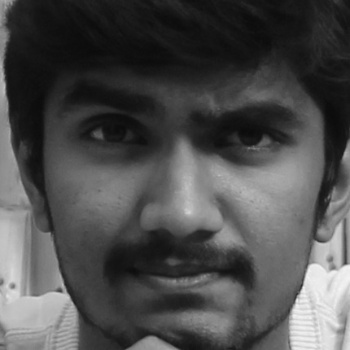

In [12]:
Image.open("./IMG_3990.JPG")

In [13]:
make_prediction("./IMG_3990.JPG")

Predicted Expression Probabilities
ANGRY: 0.9997010231018066
DISGUST: 0.00024876397219486535
FEAR: 5.798838742521184e-07
HAPPY: 1.625076606615039e-06
NEUTRAL: 1.876553369584144e-06
SAD: 4.612888369592838e-05
SURPRISE: 9.65968549593299e-09


Dominant Probability = ANGRY: 0.999701


Wall time: 998 µs


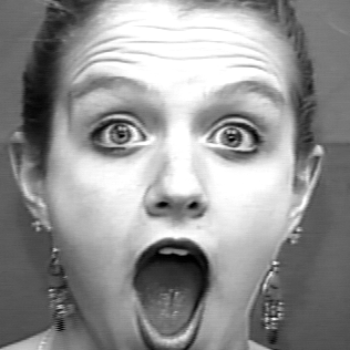

In [22]:
%%time
Image.open("./2.png")

In [21]:
%%time
make_prediction("./2.png")

Predicted Expression Probabilities
ANGRY: 1.219750737452242e-15
DISGUST: 6.944145673616328e-18
FEAR: 1.5464904357109788e-10
HAPPY: 6.764387227436996e-13
NEUTRAL: 1.1430830240688472e-13
SAD: 1.4420551962036231e-16
SURPRISE: 1.0


Dominant Probability = SURPRISE: 1.0
Wall time: 2.24 s


Wall time: 1 ms


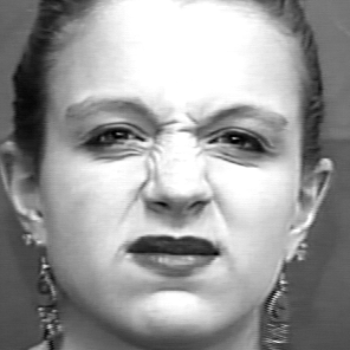

In [35]:
%%time
Image.open("./3.png")

In [30]:
%%time
make_prediction("./3.png")

Predicted Expression Probabilities
ANGRY: 1.5533154510194436e-05
DISGUST: 0.9999845027923584
FEAR: 5.551622356270158e-11
HAPPY: 1.4509556223174513e-08
NEUTRAL: 8.544692953194044e-09
SAD: 4.9592237871820544e-08
SURPRISE: 1.069485971137707e-12


Dominant Probability = DISGUST: 0.9999845
Wall time: 2.21 s


Wall time: 1 ms


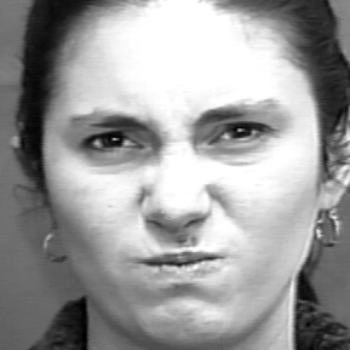

In [38]:
%%time
Image.open("./5.png")

In [37]:
%%time
make_prediction("./5.png")

Predicted Expression Probabilities
ANGRY: 0.9186261296272278
DISGUST: 0.07090277224779129
FEAR: 3.141467095701955e-05
HAPPY: 0.0001018740440485999
NEUTRAL: 0.008167111314833164
SAD: 0.0021704090759158134
SURPRISE: 2.9249454769342265e-07


Dominant Probability = ANGRY: 0.9186261
Wall time: 2.29 s


Wall time: 998 µs


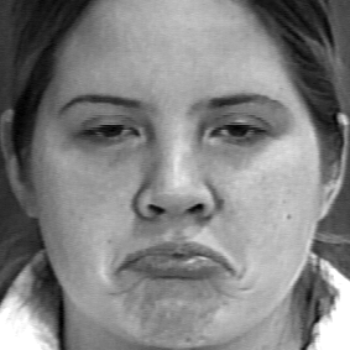

In [51]:
%%time
Image.open("./9.png")

In [52]:
%%time
make_prediction("./9.png")

Predicted Expression Probabilities
ANGRY: 0.9998887777328491
DISGUST: 6.027383642503992e-05
FEAR: 1.4115131818925875e-07
HAPPY: 8.674702201005857e-08
NEUTRAL: 6.124455467215739e-07
SAD: 5.007113577448763e-05
SURPRISE: 1.6685099968327677e-09


Dominant Probability = ANGRY: 0.9998888
Wall time: 2.29 s
